# Linear regression model

In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.make_dataset import generate_linear_data
from src.functions import gradient_descent, prediction

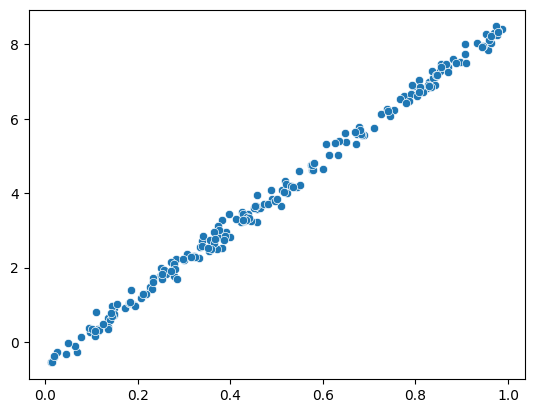

In [2]:
x_features, y_targets = generate_linear_data(200, coeff=False, seed=10)
sns.scatterplot(x=x_features, y=y_targets)
plt.show()

## Linear regression in NumPy

In [3]:
a_model, b_model, _, coeff_history = gradient_descent(
    x_features,
    y_targets,
    n_iter=500,
    alpha=0.1
)
print(f'Coefficients determined by NumPy implementation: \n'
      f'a = {a_model:.2f} \nb = {b_model:.2f}')

Coefficients determined by NumPy implementation: 
a = 9.14 
b = -0.59


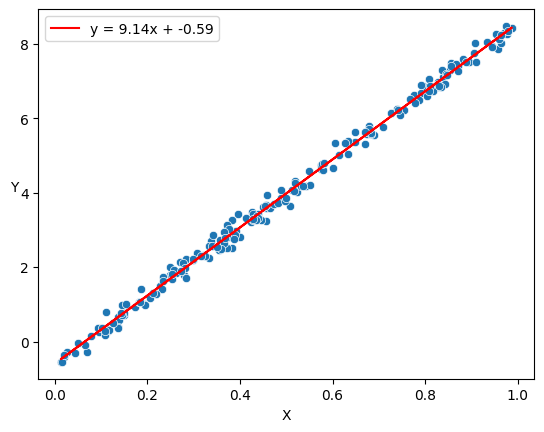

In [4]:
sns.scatterplot(x=x_features, y=y_targets)
y_regression = a_model * x_features + b_model
plt.plot(x_features, y_regression, color='red',
         label=f'y = {a_model:.2f}x + {b_model:.2f}')

# Add labels, legend, and show the plot
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.show()

## Linear regression in Scikit-learn

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_features = x_features.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(X_features, y_targets)
print(f"Coefficients determined by Scikit-learn:\na={linreg.coef_[0]:.2f}\nb={linreg.intercept_:.2f}")

Coefficients determined by Scikit-learn:
a=9.16
b=-0.60


## Comparison between NumPy and Scikit-learn

In [6]:
xp = 0.4
Xp = np.array(xp).reshape(-1,1)
print(f"NumPy prediction for y({xp}) = {prediction(xp, a=a_model, b=b_model):.2f}")
print(f"Scikit-learn prediction for y({xp}) = {linreg.predict(Xp)[0]:.2f}")

NumPy prediction for y(0.4) = 3.07
Scikit-learn prediction for y(0.4) = 3.06


# Polynomial Regression using Scikit-learn and Linear Regression

Polynomial regression is an extension of linear regression that allows us to model non-linear relationships between variables. In this section, we'll use Scikit-learn to perform polynomial regression.

The process involves the following steps:

1. Generate polynomial features from the original input features.
2. Use these polynomial features with a linear regression model.

Scikit-learn provides convenient tools for this:

- `PolynomialFeatures`: Generates polynomial and interaction features.
- `LinearRegression`: Fits a linear model.
- `make_pipeline`: Combines multiple steps into a single estimator.

We'll compare polynomials of different degrees (linear, quadratic, and cubic) to see which best fits our data. This approach allows us to capture more complex relationships in the data while still using the linear regression framework.

By visualizing the results, we can observe how increasing the polynomial degree affects the model's ability to fit the data, potentially leading to better predictions but also risking overfitting if the degree is too high.

The `generate_polynomial_data` function creates data following a polynomial equation of the form:

$y = a_0 + a_1x + a_2x^2 + ... + a_nx^n + \varepsilon$

Where:
- $n$ is the degree of the polynomial (specified by the `degree` parameter)
- $a_i$ are the coefficients (randomly generated within the `coeff_range`)
- $\varepsilon$ is the noise term (normally distributed with mean 0 and standard deviation between noise/2 and noise)

For example, with degree = 3, the equation would be:

$y = a_0 + a_1x + a_2x^2 + a_3x^3 + \varepsilon$

The polynomial regression model then tries to estimate these coefficients $(a_0, a_1, a_2, a_3)$ to best fit the generated data.
By increasing the degree, we allow the model to capture more complex relationships in the data.




Coefficients used to generate data:
a0 = -2.01
a1 = 4.35
a2 = -4.38
a3 = -8.35


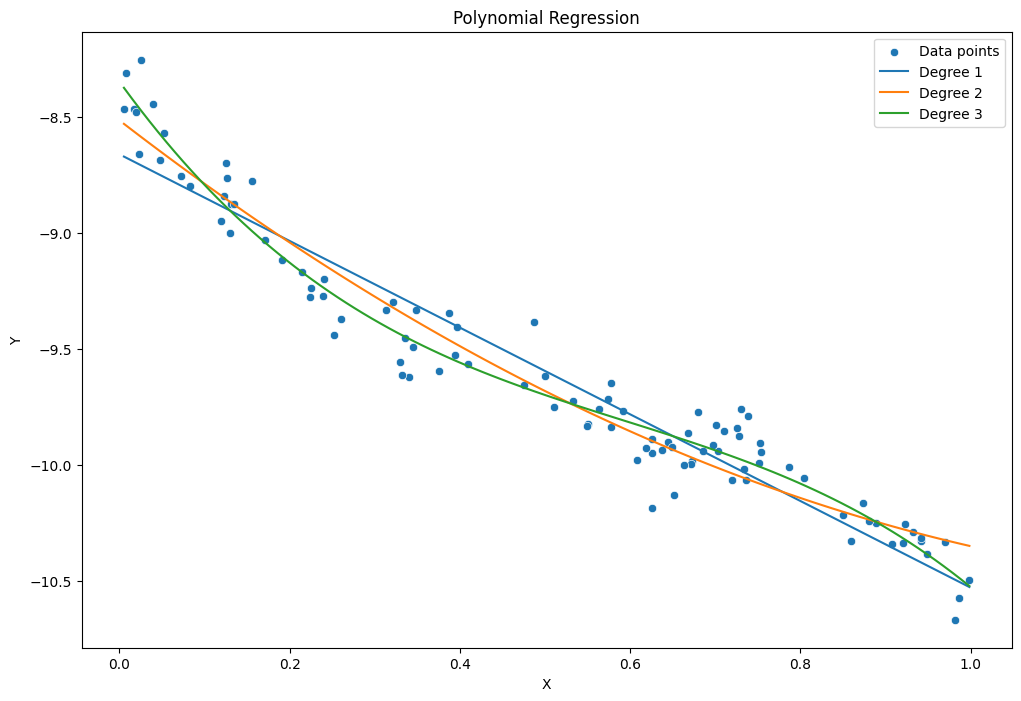

In [7]:
# Polynomial Regression using Scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from src.make_dataset import generate_polynomial_data

# Generate polynomial data
m_samples = 100
degree = 3
x_features, y_targets = generate_polynomial_data(m_samples, degree, coeff=True)
X_features = x_features.reshape(-1, 1)

# Create polynomial features
degrees = [1, 2, 3]  # We'll try linear, quadratic, and cubic polynomials

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_features, y=y_targets, label='Data points')

# Fit and plot polynomial regressions
for degree in degrees:
    # Create a pipeline that creates polynomial features and then applies linear regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Fit the model
    poly_model.fit(X_features, y_targets)
    
    # Generate points for smooth curve plotting
    X_plot = np.linspace(X_features.min(), X_features.max(), 100).reshape(-1, 1)
    y_plot = poly_model.predict(X_plot)
    
    # Plot the polynomial regression line
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()